In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import hyperobjects as ho

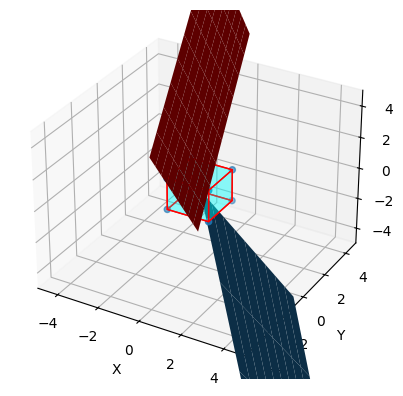

In [26]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.random.seed(42)
p, n, m = 1, 2, 3
points = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])

N = np.random.uniform(-1,1,size=(n,m))
n = (~ho.AffineSpace(N.T)).basis.ravel()

point_on_N  = N.T@np.array([1, 2])
point_on_N = point_on_N/np.linalg.norm(point_on_N)
d = -point_on_N.dot(n)
xx, yy = np.meshgrid(range(10), range(10))
z = 1/10 * (-n[0] * xx - n[1] * yy - d) * 1. /n[2]
ax.plot_surface(xx, yy, z)

P = np.identity(3)
Z = np.zeros((8,3))
for i in range(8): Z[i,:] = np.dot(points[i,:],P)
Z = 1.0*Z
# Z = P @ vertices.T

r = [-1,1]

X, Y = np.meshgrid(r, r)
# plot vertices
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

# list of sides' polygons of figure
verts = [[Z[0],Z[1],Z[2],Z[3]],
 [Z[4],Z[5],Z[6],Z[7]], 
 [Z[0],Z[1],Z[5],Z[4]], 
 [Z[2],Z[3],Z[7],Z[6]], 
 [Z[1],Z[2],Z[6],Z[5]],
 [Z[4],Z[7],Z[3],Z[0]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ho.AffineSpace(N.T).plot(ax, color="red", scale=60)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [19]:
(~ho.AffineSpace(N.T)).basis

array([[0.96544045],
       [0.26008044],
       [0.01681969]])

0.07942490404307401
3.335412132748941


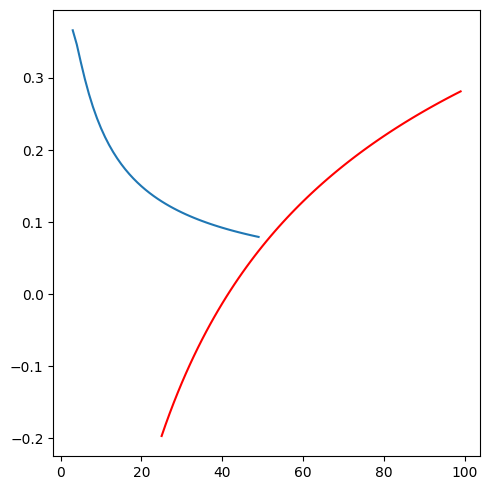

In [79]:
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

p, n, m = 3, 7, 50
D = list(range(3, m))
ax.plot(D, [np.log(d)/d for d in D])

min_val = np.min([np.log(d)/d for d in D])
print(min_val)

c = (1-p/m) / np.sqrt(min_val)
print(c)

# ax.plot(D, [np.log(d)/d - c for d in D], c="red")
ax.plot(range(25,100), [1 - c*np.sqrt(np.log(d)/d) for d in range(25, 100)], c="red")
# ax.plot(D, [1 - 3*np.sqrt(6)/np.log(d) for d in D], c="green")

plt.tight_layout()